In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#load data from csv to pandas dataframe

carbon_data = pd.read_csv('/Users/rishsabnavis/Documents/carbon/EmissionData.csv')

In [29]:
#print data(first five rows)
carbon_data.head()

,Year(Decimal),Monthly_Average,Deseasonalized_Average
0,1958.2027,315.71,314.44
1,1958.2877,317.45,315.16
2,1958.3699,317.51,314.69
3,1958.4548,317.27,315.15
4,1958.5370,315.87,315.20


In [30]:
#print data(last 5 rows)
carbon_data.tail()

,Year(Decimal),Monthly_Average,Deseasonalized_Average
789,2023.9583,421.86,422.60
790,2024.0417,422.80,422.48
791,2024.1250,424.62,423.67
792,2024.2083,425.38,423.89
793,2024.2917,426.57,423.91


In [31]:
#Getting info regarding carbon emission data
carbon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year(Decimal)           794 non-null    float64
 1   Monthly_Average         794 non-null    float64
 2   Deseasonalized_Average  794 non-null    float64
dtypes: float64(3)
memory usage: 18.7 KB


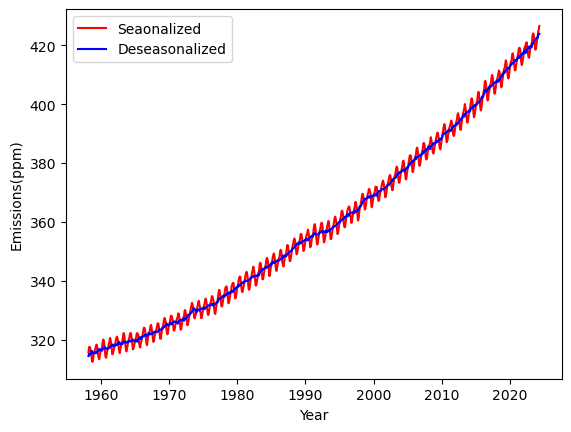

In [43]:
#Data Visualization Basic Plot
yeardata = carbon_data['Year(Decimal)']
emissiondata = carbon_data['Monthly_Average']
plt.plot(yeardata,emissiondata, color = 'red')
plt.plot(yeardata,carbon_data['Deseasonalized_Average'],color='blue')
plt.legend(['Seaonalized','Deseasonalized'])
plt.xlabel('Year')
plt.ylabel('Emissions(ppm)')
plt.show()

In [58]:
#Split Data into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(yeardata,emissiondata,test_size=0.2,random_state=0)
# Convert to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
# Reshape if necessary
if len(X_train.shape) == 1:
    X_train = X_train.reshape(-1, 1)
if len(X_test.shape) == 1:
    X_test  = X_test.reshape(-1,1)
y_train = y_train.ravel()  # Ensure y_train is a 1D array
y_test = y_test.ravel()



In [59]:
#Import Linear Regression Libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [60]:
#Build models
model = linear_model.LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [61]:
Y_pred = model.predict(X_test)


In [63]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: [1.63766167]
Intercept: -2902.004452067557
Mean squared error (MSE): 23.89
Coefficient of determination (R^2): 0.98


<Axes: >

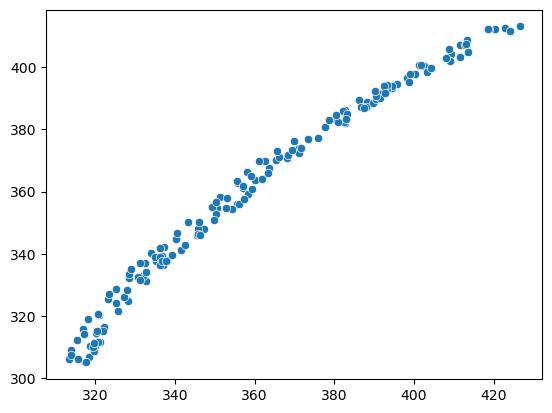

In [68]:
#Plot Scatterplot
np.array(y_test)
sns.scatterplot(x=y_test, y=Y_pred)
